# AIS Trajectory Analysis
## 1. Read data
## 2. Fitting
## 3. Noise disturbed data generazation
## 4. Visualization

# Data preprocessing
### 1. Read .csv data
### 2. Mapping: Vessel_id, time_stamp, LAT maneuver, LON maneuver

In [103]:
from datetime import timedelta
from datetime import datetime
from math import *
import matplotlib.pyplot as plt

In [28]:
import pandas as pd
rootp = "/home1/AISData/"
# rootp = "data/"
item = "AIS_2021_12_31.csv"
path = rootp+item
df = pd.read_csv(path)

In [29]:
import numpy as np
D = df.to_numpy()
D

array([[367610530, '2021-12-31T00:00:01', 25.77779, ..., nan, 60.0, 'A'],
       [232037842, '2021-12-31T00:00:01', 32.77629, ..., 0.0, 37.0, 'A'],
       [367672550, '2021-12-31T00:00:02', 29.29809, ..., nan, 40.0, 'A'],
       ...,
       [368926395, '2021-12-31T14:35:47', 13.43261, ..., nan, nan, 'B'],
       [368926395, '2021-12-31T14:56:46', 13.4326, ..., nan, nan, 'B'],
       [368926395, '2021-12-31T15:38:43', 13.44252, ..., nan, nan, 'B']],
      dtype=object)

In [35]:
V_id = D[:,0] # Read Maritime Mobile Service Identity value MMSI
V_id = np.unique(V_id)
V_id.shape

(15435,)

In [21]:
D[:,1] = D[:,1].astype('str')
T = np.unique(D[:,1].astype('str'))
T.shape

(86128,)

In [179]:
Track = []
i = 5700
track = D[np.argwhere(D[:,0]==V_id[i])]
track = track.reshape(track.shape[0],track.shape[2])[:,(1,2,3)]
track

array([['2021-12-31T00:02:34', 40.64707, -80.49652],
       ['2021-12-31T00:08:34', 40.64707, -80.49652],
       ['2021-12-31T00:05:34', 40.64707, -80.49652],
       ['2021-12-31T00:11:34', 40.64705, -80.49652],
       ['2021-12-31T00:14:34', 40.64707, -80.49652],
       ['2021-12-31T00:20:34', 40.64705, -80.49652],
       ['2021-12-31T00:23:34', 40.64707, -80.49652],
       ['2021-12-31T00:32:34', 40.64707, -80.49652],
       ['2021-12-31T00:44:34', 40.64707, -80.49652],
       ['2021-12-31T00:47:34', 40.64707, -80.49652],
       ['2021-12-31T00:53:34', 40.64705, -80.49652],
       ['2021-12-31T01:05:34', 40.64707, -80.49653],
       ['2021-12-31T00:59:34', 40.64707, -80.49652],
       ['2021-12-31T01:20:34', 40.64707, -80.4965],
       ['2021-12-31T01:23:34', 40.64705, -80.4965],
       ['2021-12-31T01:14:34', 40.64707, -80.49653],
       ['2021-12-31T01:44:34', 40.64707, -80.4965],
       ['2021-12-31T01:53:34', 40.64705, -80.49652],
       ['2021-12-31T01:59:34', 40.64707, -80.4965

In [180]:
t = []
t.append(0)
for j in range(0,track.shape[0]-1):
    delta_t = (datetime.fromisoformat(track[j+1,0])-datetime.fromisoformat(track[0,0])).total_seconds()
    t.append(delta_t)
t = np.array(t) - t[0]
track[:,0] = t
track = np.sort(track,0)
track

array([[0.0, 40.64702, -80.49655],
       [180.0, 40.64703, -80.49655],
       [360.0, 40.64703, -80.49655],
       [540.0, 40.64703, -80.49655],
       [720.0, 40.64705, -80.49655],
       [1080.0, 40.64705, -80.49655],
       [1260.0, 40.64705, -80.49653],
       [1800.0, 40.64705, -80.49653],
       [2520.0, 40.64705, -80.49653],
       [2700.0, 40.64705, -80.49653],
       [3060.0, 40.64705, -80.49653],
       [3420.0, 40.64705, -80.49653],
       [3780.0, 40.64705, -80.49653],
       [4320.0, 40.64705, -80.49653],
       [4680.0, 40.64705, -80.49653],
       [4860.0, 40.64705, -80.49653],
       [5580.0, 40.64705, -80.49653],
       [5760.0, 40.64705, -80.49653],
       [6120.0, 40.64705, -80.49653],
       [6300.0, 40.64705, -80.49653],
       [6480.0, 40.64705, -80.49653],
       [6660.0, 40.64705, -80.49653],
       [7020.0, 40.64705, -80.49653],
       [7200.0, 40.64705, -80.49653],
       [7560.0, 40.64705, -80.49653],
       [8280.0, 40.64705, -80.49653],
       [8460.0, 40.

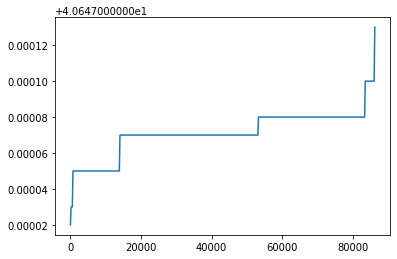

In [181]:
plt.plot(track[:,0],track[:,1])

In [182]:
def millerToXY(lat, lon):
    """
    :param lon: 经度
    :param lat: 维度
    :return:
    """
    xy_coordinate = []
    L = 6381372*pi*2    #地球周长
    W = L                    #平面展开，将周长视为X轴
    H = L/2                  #Y轴约等于周长一般
    mill = 2.3               #米勒投影中的一个常数，范围大约在正负2.3之间  
    x = lon*pi/180      #将经度从度数转换为弧度
    y = lat*pi/180      #将纬度从度数转换为弧度 
    y = 1.25*log(tan(0.25*pi+0.4*y))  #这里是米勒投影的转换 
    
    # 这里将弧度转为实际距离 ，转换结果的单位是公里
    x = (W/2)+(W/(2*pi))*x
    y = (H/2)-(H/(2*mill))*y
    #xy_coordinate.append((int(round(x)),int(round(y))))
    return np.array([x,y])
xy = []
xy.append(np.array([0,0]))
for j in range(0,track.shape[0]-1):
    xy.append(millerToXY(track[j+1,1],track[j+1,2])-millerToXY(track[0,1],track[0,2]))
xy = np.array(xy)
xy

array([[ 0.        ,  0.        ],
       [ 0.        , -0.90206824],
       [ 0.        , -0.90206824],
       [ 0.        , -0.90206824],
       [ 0.        , -2.70620497],
       [ 0.        , -2.70620497],
       [ 2.22751904, -2.70620497],
       [ 2.22751904, -2.70620497],
       [ 2.22751904, -2.70620497],
       [ 2.22751904, -2.70620497],
       [ 2.22751904, -2.70620497],
       [ 2.22751904, -2.70620497],
       [ 2.22751904, -2.70620497],
       [ 2.22751904, -2.70620497],
       [ 2.22751904, -2.70620497],
       [ 2.22751904, -2.70620497],
       [ 2.22751904, -2.70620497],
       [ 2.22751904, -2.70620497],
       [ 2.22751904, -2.70620497],
       [ 2.22751904, -2.70620497],
       [ 2.22751904, -2.70620497],
       [ 2.22751904, -2.70620497],
       [ 2.22751904, -2.70620497],
       [ 2.22751904, -2.70620497],
       [ 2.22751904, -2.70620497],
       [ 2.22751904, -2.70620497],
       [ 2.22751904, -2.70620497],
       [ 2.22751904, -2.70620497],
       [ 2.22751904,

# Fitting
### 1. lon and lat to x and y
### 2. visualization
### 3. polynomial fitting for x and y axis

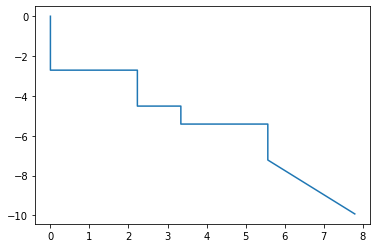

In [183]:
%matplotlib inline
plt.plot(xy[:,0],xy[:,1])